In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Example

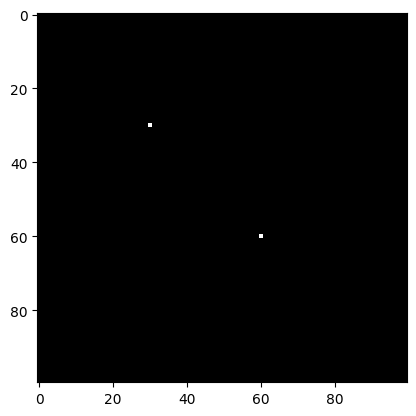

In [52]:
# create image with 2 points
image = np.zeros((100, 100), dtype=np.uint8)
image[30, 30] = 255
image[60, 60] = 255
plt.imshow(image, cmap='gray')

In [41]:
# define thetas and rhos, the largest possible rho is the diagonal of the image
thetas = np.deg2rad(np.arange(-90, 90, 1))
diag = int(round(np.sqrt(image.shape[0]**2 + image.shape[1]**2)))
rhos = np.arange(-diag, diag, 1)

cos_thetas = np.cos(thetas)
sin_thetas = np.sin(thetas)
# create accumulator
accumulator = np.zeros((len(rhos), len(thetas)), dtype=np.uint8)

# find the indices of the detected edges (just points in this case)
y_indices, x_indices = np.nonzero(image)

# loop over these points and calculate rho for each theta and increment the accumulator
for i in range(len(x_indices)):
    x = x_indices[i]
    y = y_indices[i]
    for j in range(len(thetas)):
        rho = x * cos_thetas[j] + y * sin_thetas[j]
        rho_index = diag + int(rho)
        accumulator[rho_index, j] += 1

Text(0, 0.5, 'Rho (distance from origin)')

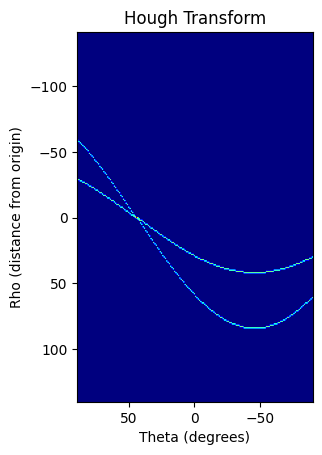

In [65]:
# plot the parameter space
plt.imshow(accumulator, cmap='jet', extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
plt.title('Hough Transform')
plt.xlabel('Theta (degrees)')
plt.ylabel('Rho (distance from origin)')

Text(0.5, 1.0, 'Detected Line')

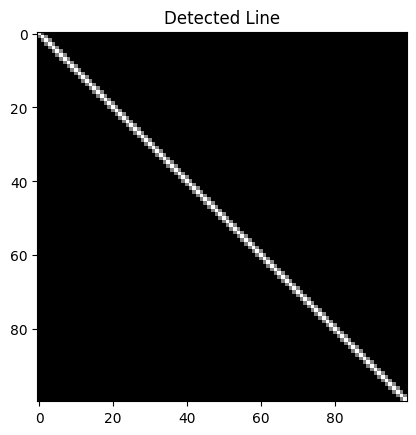

In [57]:
# fin the maximum value in the accumulator which means the parameters of the detected line
line_index = np.argmax(accumulator)
rho_index = line_index // accumulator.shape[1]
theta_index = line_index % accumulator.shape[1]

# calculate the parameters of the detected line
rho = rhos[rho_index]
theta = thetas[theta_index]
a = np.cos(theta)
b = np.sin(theta)
x0 = a * rho
y0 = b * rho

# draw the detected line
point1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
point2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
cv2.line(image, point1, point2, (255, 0, 0), 1, cv2.LINE_AA)
plt.imshow(image, cmap='gray')
plt.title('Detected Line')

### Using OpenCV's HoughLines function

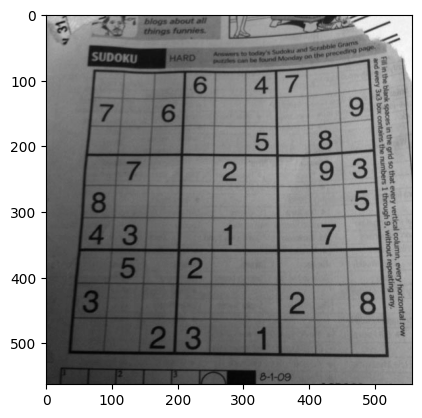

In [59]:
image = cv2.imread('data/sudoku.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

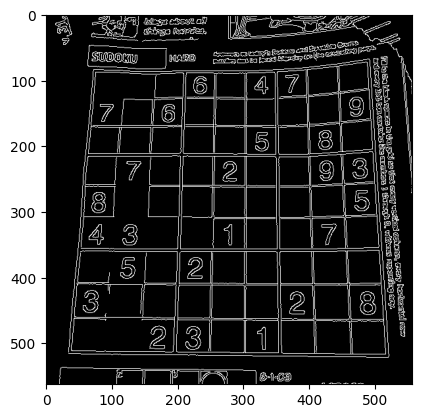

In [61]:
# edges detection with Canny
edges = cv2.Canny(image, 50, 150, apertureSize=3)
plt.imshow(edges, cmap='gray')


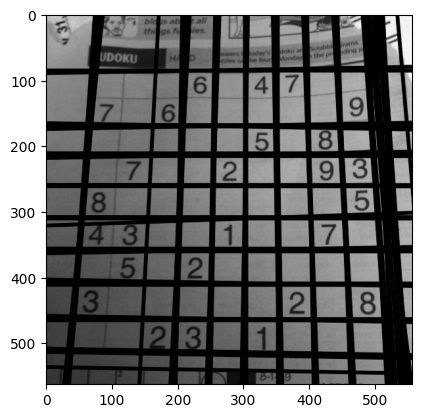

In [64]:
# perform hough transform
lines = cv2.HoughLines(edges, rho=1, theta=np.pi / 180, threshold=150)

# draw lines
for i in range(len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    point1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
    point2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
    cv2.line(image, point1, point2, (0, 0, 255), 3, cv2.LINE_AA)

plt.imshow(image, cmap='gray')

### Detect circles with Hough Transform

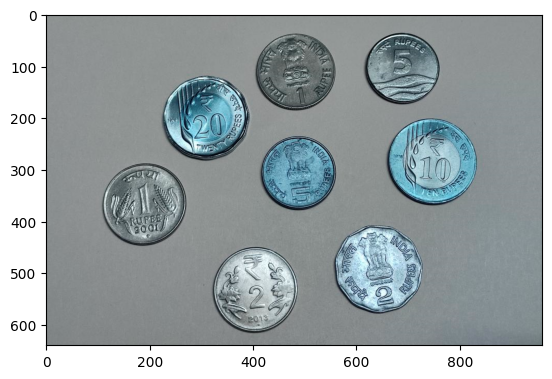

In [85]:
coins_image = cv2.imread('data/coins.png')
gray_image = cv2.cvtColor(coins_image, cv2.COLOR_BGR2GRAY)
plt.imshow(coins_image, cmap='gray')

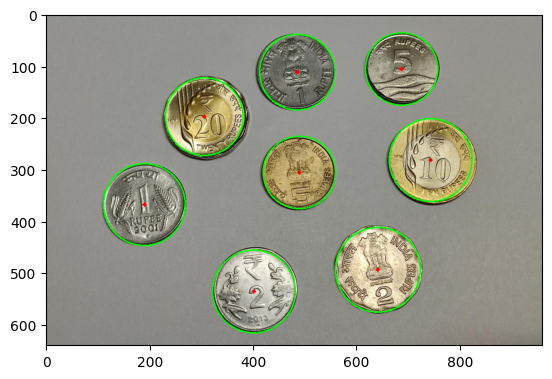

In [87]:
# hough transform for circles
circles = cv2.HoughCircles(gray_image, method=cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=100, param2=50, minRadius=50, maxRadius=100)
circles = np.uint16(np.around(circles))
# draw circles
for i in circles[0, :]:
    cv2.circle(coins_image, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv2.circle(coins_image, (i[0], i[1]), 2, (0, 0, 255), 3)
coins_image = cv2.cvtColor(coins_image, cv2.COLOR_BGR2RGB)
plt.imshow(coins_image)